## SVM Kernels Intuition and Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [3]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

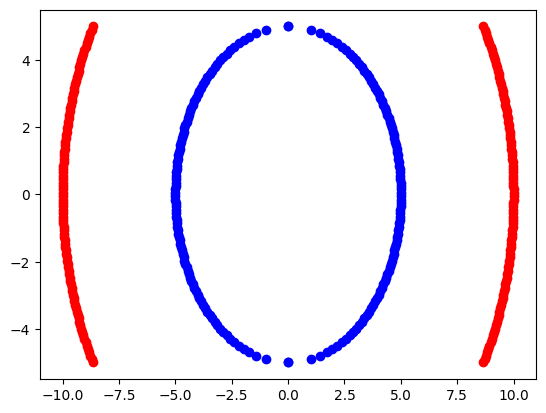

In [4]:
plt.scatter(y, x, color='r')
plt.scatter(y1, x1, color='b')

In [5]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y']=1
df = pd.concat([df1, df2], axis=0)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


### Polynomial Kernel

In [7]:
## Components for Polynomial Kernel
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = df['X1'] * df['X2']

In [8]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [9]:
df.tail()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740
199,-0.000000,-5.00000,1,0.000000,25.000000,0.000000


In [10]:
## Feature Separation - Independent and Dependent features
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [11]:
X

,X1,X2,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009
...,...,...,...,...,...
195,-1.969049,-4.59596,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,0.999898,24.000102,4.898740


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
import plotly.express as px

In [16]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')

fig.show()

In [17]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')

fig.show()

In [18]:
from sklearn.svm import SVC

### Linear Kernel

In [19]:
svc = SVC(kernel='linear')

In [20]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = svc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy Score: 1.0
Confusion Matrix: 
[[63  0]
 [ 0 57]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Polynomial Kernel

- For polynomial kernel, we don't need to manually calculate the polynomial features. It will be done by the kernel itself.

In [28]:
svc_poly = SVC(kernel='poly')

In [29]:
svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [30]:
y_pred_poly = svc_poly.predict(X_test)

In [35]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_poly)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_poly)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_poly)}')

Accuracy Score: 1.0
Confusion Matrix: 
[[63  0]
 [ 0 57]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Radial Basis Function (RBF) Kernel

In [32]:
svc_rbf = SVC(kernel='rbf')

In [33]:
svc_rbf.fit(X_train, y_train)

SVC()

In [34]:
y_pred_rbf = svc_rbf.predict(X_test)

In [36]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rbf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rbf)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_rbf)}')

Accuracy Score: 1.0
Confusion Matrix: 
[[63  0]
 [ 0 57]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Sigmoid Kernel

In [37]:
svc_sigmoid = SVC(kernel='sigmoid')

In [38]:
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [39]:
y_pred_sigmoid = svc_sigmoid.predict(X_test)

In [40]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_sigmoid)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_sigmoid)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_sigmoid)}')

Accuracy Score: 1.0
Confusion Matrix: 
[[63  0]
 [ 0 57]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

